In [2]:
import numpy as np
import pandas as pd 
import os

In [3]:
df=pd.read_csv("combined_dataset.csv")

In [7]:
print(df.shape)
print(df.isnull().sum())
df.head()

(697749, 84)
Flow ID      0
Src IP       0
Src Port     0
Dst IP       0
Dst Port     0
            ..
Idle Mean    0
Idle Std     0
Idle Max     0
Idle Min     0
Label        0
Length: 84, dtype: int64


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.137.42-192.168.137.33-16725-6668-6,192.168.137.42,16725,192.168.137.33,6668,6,26/10/2022 12:47:01 PM,90892975,2,0,...,20,0.0,0.0,0.0,0.0,90892975.0,0.0,90892975.0,90892975.0,ddos_ack_frag
1,192.168.137.204-192.168.137.20-80-46018-6,192.168.137.204,80,192.168.137.20,46018,6,26/10/2022 01:38:52 PM,32886,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos_ack_frag
2,192.168.137.186-192.168.137.235-63790-8008-6,192.168.137.186,63790,192.168.137.235,8008,6,26/10/2022 03:52:54 PM,51449412,2,0,...,20,0.0,0.0,0.0,0.0,51449412.0,0.0,51449412.0,51449412.0,ddos_ack_frag
3,192.168.137.204-192.168.137.17-80-5806-6,192.168.137.204,80,192.168.137.17,5806,6,26/10/2022 01:34:23 PM,46874,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos_ack_frag
4,44.208.194.56-192.168.137.187-443-51810-6,44.208.194.56,443,192.168.137.187,51810,6,08/10/2022 05:16:48 AM,72898,6,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign


In [11]:
# Function to identify actual data types in each column
def identify_actual_dtypes(df):
    inferred_dtypes = {}
    for col in df.columns:
        # Get the set of unique types in the column
        unique_types = set(df[col].dropna().map(type))
        if len(unique_types) == 1:
            # If all elements are of the same type, use that
            inferred_dtypes[col] = list(unique_types)[0]
        else:
            # Mixed types
            inferred_dtypes[col] = "mixed"
    return inferred_dtypes

# Function to apply inferred data types
def apply_actual_dtypes(df, inferred_dtypes):
    for col, dtype in inferred_dtypes.items():
        if dtype == int:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')  # Handles missing values
        elif dtype == float:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        elif dtype == str:
            df[col] = df[col].astype(str)
        elif dtype == "mixed":
            print(f"Column '{col}' contains mixed types and cannot be cast to a single dtype.")
    return df

# Identify data types
actual_dtypes = identify_actual_dtypes(df)

# Apply inferred data types
df = apply_actual_dtypes(df, actual_dtypes)

# Output the updated DataFrame
print("Updated DataFrame:")
print(df)

# Check the dtypes
print("\nUpdated Data Types:")
print(df.dtypes)


Updated DataFrame:
                                             Flow ID           Src IP  \
0         192.168.137.42-192.168.137.33-16725-6668-6   192.168.137.42   
1          192.168.137.204-192.168.137.20-80-46018-6  192.168.137.204   
2       192.168.137.186-192.168.137.235-63790-8008-6  192.168.137.186   
3           192.168.137.204-192.168.137.17-80-5806-6  192.168.137.204   
4          44.208.194.56-192.168.137.187-443-51810-6    44.208.194.56   
...                                              ...              ...   
697744    192.168.137.233-54.167.177.211-33178-443-6  192.168.137.233   
697745    192.168.137.65-192.168.137.71-50651-6668-6   192.168.137.65   
697746    192.168.137.65-192.168.137.46-33507-6668-6   192.168.137.65   
697747     192.168.137.234-192.168.137.1-36175-53-17  192.168.137.234   
697748      192.168.137.94-99.84.108.103-53076-443-6   192.168.137.94   

       Src Port           Dst IP Dst Port  Protocol               Timestamp  \
0         16725   192.168

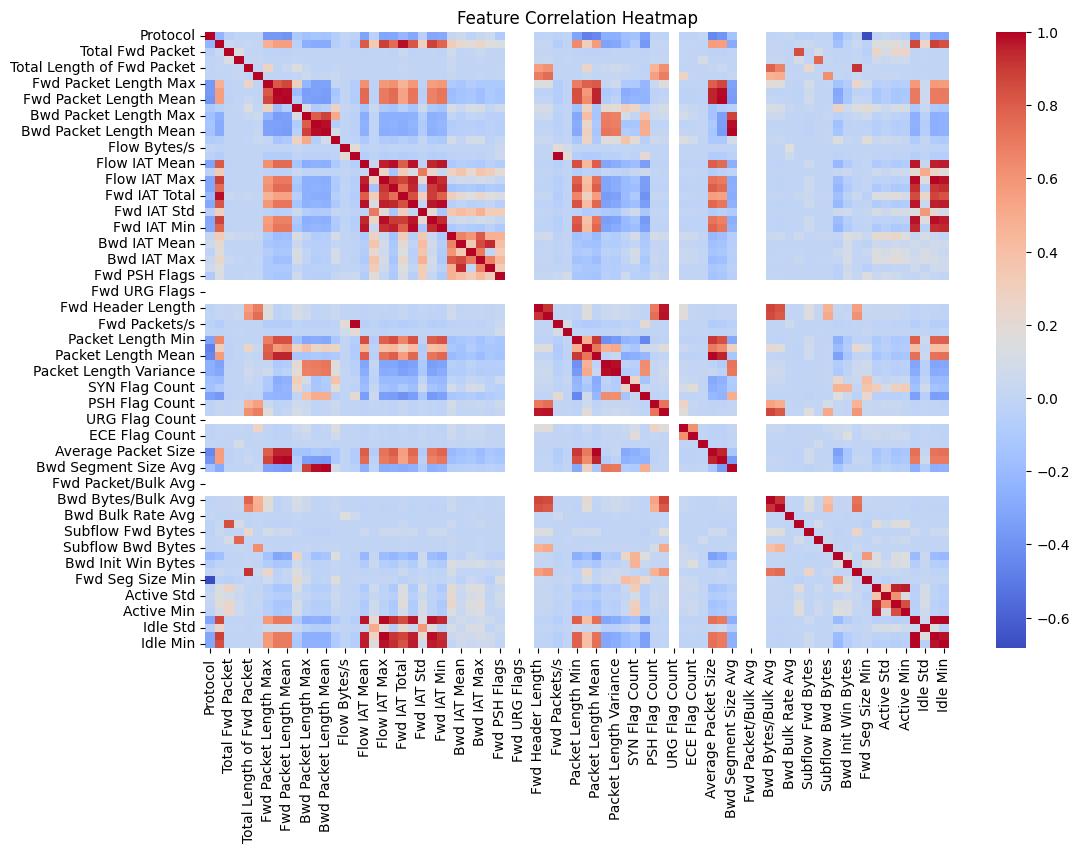

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

for col in numeric_df.columns:
    if numeric_df[col].dtype == 'int64':
        numeric_df[col] = numeric_df[col].astype('int32')
    elif numeric_df[col].dtype == 'float64':
        numeric_df[col] = numeric_df[col].astype('float32')

# Replace infinite values with NaN
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Split features and target
X = numeric_df
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                Feature  Importance
52  Average Packet Size    0.383060
65   FWD Init Win Bytes    0.094670
19         Flow IAT Min    0.033613
14         Flow Bytes/s    0.033242
15       Flow Packets/s    0.028954
..                  ...         ...
55   Fwd Bytes/Bulk Avg    0.000000
48       URG Flag Count    0.000000
31        Bwd PSH Flags    0.000000
32        Fwd URG Flags    0.000000
57    Fwd Bulk Rate Avg    0.000000

[77 rows x 2 columns]
